História

Considere um cenário de irrigação de uma plantação em uma localidade de clima semi-árido, onde é comum haver estiagem de muitos dias, as vezes meses.

Um pequeno produtor deseja saber se sua cisterna de 30.000 litros (que se encontra em sua capacidade máxima) será suficiente para irrigar sua plantação (uma área de 100 m²) pelos próximos 30 dias, assumindo que não irá chover.

Um técnico agrícola forneceu informações da lâmina diária de irrigação (em mm/dia) que costuma ser aplicada sobre esta cultura em situações similares, as quais se encontram na base de dados irr.csv.

O que fazer?

De posse destes dados e com as ferramentas que conhecemos na disciplina, como podemos responder à pergunta do produtor?

Procure elaborar um colab com sua solução. Organize seu código e use texto explicativo para mostrar as respostas de suas perguntas. Ao final, apresente um link de compartilhamento do seu colab.

Dados

https://raw.githubusercontent.com/glaucogoncalves/p-e/main/ex01/irr.csv


Dicas

1) Para fazer o download dos dados no colab use !wget https://raw.githubusercontent.com/glaucogoncalves/p-e/main/ex01/irr.csv (o ponto de exclamação não é erro)

2) 1mm de lâmina de irrigação equivale à 1 litro / m².

In [86]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbrn
import io
import random

In [ ]:
#importando os dados e fazendo os primeiros tratamentos.
!wget https://raw.githubusercontent.com/glaucogoncalves/p-e/main/ex01/irr.csv
#aqui está sendo separado todo os dados, sem remover o outlier
arq = pd.read_csv("irr.csv",header=None,names=["laminas"])
#o df "arquivo" recebe o tratamento para remoção do outlier
arquivo = (arq[(arq.laminas > 0)])
arquivo

Text(0.5, 1.0, 'irrigação diária')

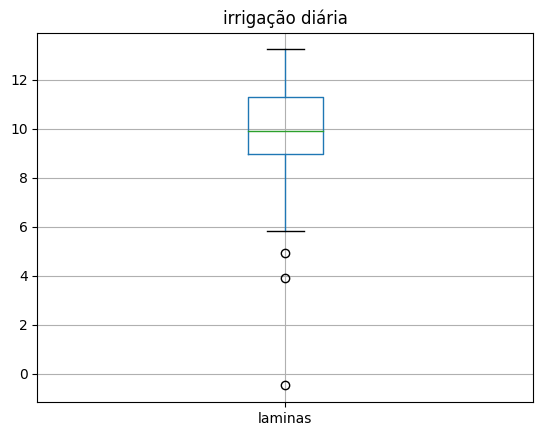

In [88]:
#Boxplot com outlier
arq.boxplot(column="laminas")
plt.title('irrigação diária')

Text(0.5, 1.0, 'irrigação diária')

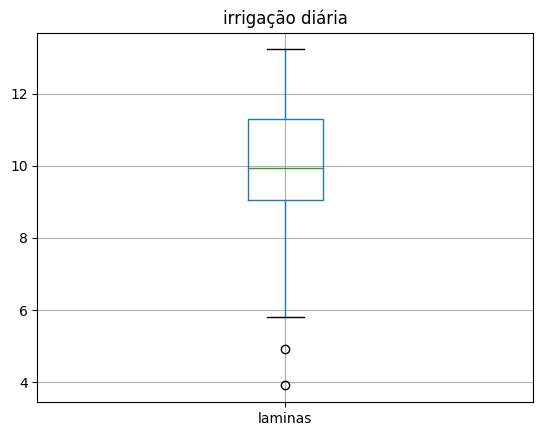

In [89]:
#Boxplot removendo o outlier
arquivo.boxplot(column="laminas")
plt.title('irrigação diária')

A media da irrigação em mm/dia está se enquadrando em 10, que pelo cálculo é o que equivale a 1000 litros por dia para irrigar toda a plantação em todos os dias do mês.

Text(0, 0.5, '')

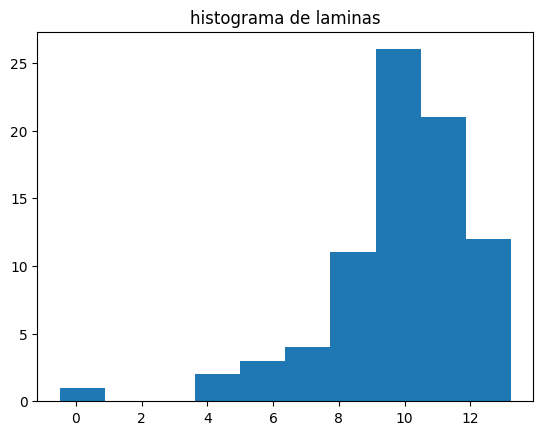

In [90]:
#Histograma com outlier
plt.subplot(1,1,1)
arq["laminas"].plot.hist(title="histograma de laminas")
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

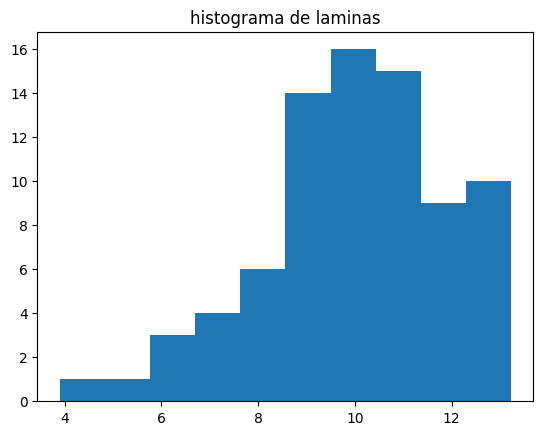

In [91]:
#Histograma removendo o outlier
plt.subplot(1,1,1)
arquivo["laminas"].plot.hist(title="histograma de laminas")
plt.xlabel("")
plt.ylabel("")

Utilizando também os histogramas para verificar que o ponto de maior pico fica em 10.


---

multiplicar o valor da lamina por 100
import random

In [92]:
random.seed(1000)# para nossos valores não mudarem de acordo com cada execução

oferta = 30000
n = 100
falha = 0

for i in range(n):
  demanda = 0
  for j in range(30):
    demanda+= 100*random.choice(list(arquivo["laminas"]))
  if (demanda > oferta):
    falha += 1

prob = falha/n
print ("A probabilidade de não ser o suficiente fica ≈",prob)

A probabilidade de não ser o suficiente fica ≈ 0.44


Usando a semente para não variar nosso teste, vemos que a taxa fica em torno de 44% de falha, entre a oferta pela demanda necessária para abastecer a cisterna.

In [93]:
media = arquivo["laminas"].mean()
mediana = arquivo["laminas"].median()
desvio = arquivo["laminas"].std(ddof=0)
print("mediana: "+str(mediana))
print("media: "+str(media))
print("desvio: "+str(desvio))

mediana: 9.94110730229246
media: 9.943017749233348
desvio: 1.9016816640088838


# Teste de hipótese

In [94]:
#A hipótese é que os dados seguem uma distribuição normal.

In [95]:
def grafico(x, sup, f, nome):
    plt.hist(x, label="Dados", density=True)
    plt.plot(sup, f, label=nome)
    plt.legend()
    plt.show()

In [96]:
laminas = arquivo.values.flatten()
medlamina = np.mean(laminas)
desviop = np.std(laminas)

In [97]:
_, p_value = st.shapiro(laminas)
alpha = 0.05
p_value

0.014589063823223114

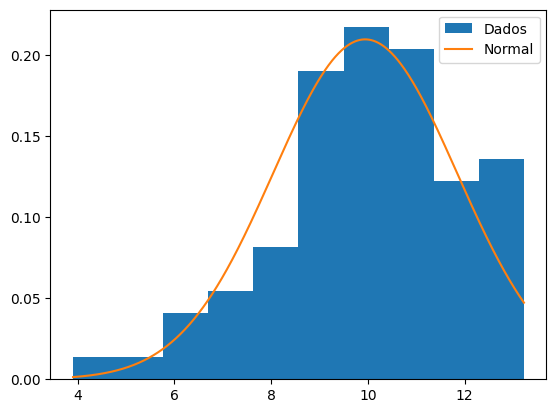

In [98]:
params = st.norm.fit(laminas)
sup = np.linspace(min(laminas), max(laminas), 1000)
grafico(laminas, sup, st.norm.pdf(sup, params[0], params[1]), "Normal")

Com uma significância de 0.05 eu não rejeito a hipótese nula.